## Canine Assistant: RAG Application and Embedding Configuration Evaluation

This notebook presents a RAG application specialized in canine care and puppy training. The application uses an intelligent system to route questions to different knowledge sources and evaluates different embedding configurations to optimize performance.

## 1. Configuration et imports

In [1]:
import os
import random
import logging
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from langchain.callbacks import get_openai_callback

# Import modules from our application
from document_loader import load_document_with_unstructured, split_document_with_unstructured
from embedding_models import (
    OpenAIEmbeddingModel,
    OpenAIWithCohereRerankModel,
    SnowflakeArcticEmbedModel,
    SnowflakeArcticEmbedFineTunedModel
)
from rag_system import RAGSystem
from agent_workflow import AgentWorkflow

# Logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Load environment variables
load_dotenv()

# Check required API keys
if "OPENAI_API_KEY" not in os.environ:
    raise ValueError("OpenAI API key is required and must be defined in the .env file or environment variables")

# Configuration parameters
PDF_PATH = "data/BD_PuppiesForDummies.pdf"
PUPPIES_START_PAGE = 26
PUPPIES_END_PAGE = 403

/Users/jthomazo/Archives/01_Projets/02_AIM/AIE6/11_Midterm_Challenge/.venv_py312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Loading and preparing documents

In [2]:
# Load the document with Unstructured.io
print("Loading document...")
documents = load_document_with_unstructured(
    pdf_path=PDF_PATH,
    start_page=PUPPIES_START_PAGE,
    end_page=PUPPIES_END_PAGE
)

# Split the document into chunks
print("Splitting document into chunks...")
split_documents = split_document_with_unstructured(documents)
print(f"Document loaded and split into {len(split_documents)} chunks")

2025-05-12 18:45:19,141 - INFO - Loading PDF with Unstructured.io: data/BD_PuppiesForDummies.pdf, pages 26 to 403
2025-05-12 18:45:19,177 - INFO - pikepdf C++ to Python logger bridge initialized


Loading document...


2025-05-12 18:45:27,187 - INFO - Extraction completed: 6089 raw elements extracted
2025-05-12 18:45:27,196 - INFO - Conversion completed: 4129 LangChain documents created after filtering
2025-05-12 18:45:27,201 - INFO - Splitting 4129 documents into chunks with Unstructured.io
2025-05-12 18:45:27,240 - INFO - Splitting completed: 461 chunks created


Splitting document into chunks...
Document loaded and split into 461 chunks


## 3. Creating embedding models and RAG Systems

In [3]:
# 3.1 Standard OpenAI Configuration
print("Creating standard OpenAI configuration...")
openai_embedding = OpenAIEmbeddingModel()
openai_embedding.create_vector_store(split_documents, "openai_embedding_store", k=5)
rag_system_openai = RAGSystem(openai_embedding.get_retriever())
rag_tool_openai = rag_system_openai.create_rag_tool()
agent_workflow_openai = AgentWorkflow(rag_tool_openai)

# 3.2 OpenAI Configuration with Cohere Rerank (if API key is available)
agent_workflow_openai_cohere = None
if "COHERE_API_KEY" in os.environ:
    print("Creating OpenAI configuration with Cohere Rerank...")
    openai_cohere_embedding = OpenAIWithCohereRerankModel()
    openai_cohere_embedding.create_vector_store(split_documents, "openai_cohere_embedding_store", k=20)
    rag_system_openai_cohere = RAGSystem(openai_cohere_embedding.get_retriever())
    rag_tool_openai_cohere = rag_system_openai_cohere.create_rag_tool()
    agent_workflow_openai_cohere = AgentWorkflow(rag_tool_openai_cohere)
else:
    print("Cohere API key is not available, OpenAI configuration with Cohere Rerank will not be created")


Creating standard OpenAI configuration...


2025-05-12 18:45:34,335 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:45:35,568 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:45:37,783 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:45:39,611 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:45:43,824 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:45:46,125 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:45:49,086 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:45:55,230 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:45:56,255 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:45:56,479 - INFO - [Ope

Creating OpenAI configuration with Cohere Rerank...


2025-05-12 18:45:57,429 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:45:58,878 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:46:00,958 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:46:03,011 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:46:04,767 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:46:06,320 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:46:08,618 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:46:11,736 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:46:16,171 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:46:16,661 - INFO - [Ope

## 4. Testing the application with the default configuration

In [4]:
def test_agent_workflow(workflow, question):
    """Tests the agent workflow on a question"""
    print(f"\nQuestion: {question}")
    print("-" * 80)

    # Process the question
    result = workflow.process_question(question)
    # Get the final response
    final_response = workflow.get_final_response(result)
    # Display the final response
    print("\nFinal response:")
    print(final_response) 
    print("=" * 80)
    
    return result

# Test the application with different questions
test_questions = [
    "How do I teach my puppy to do his business outside?",  # Dog-related question
    "How do I train my puppy to detect landmines?",  # Dog-related question +  not in the context
    "What's the weather like in Paris today?"  # Non-dog-related question
]

for question in test_questions:
    test_agent_workflow(agent_workflow_openai, question)


Question: How do I teach my puppy to do his business outside?
--------------------------------------------------------------------------------


2025-05-12 18:46:24,745 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 18:46:24,750 - INFO - [Smart Router] Question related to dogs
/Users/jthomazo/Archives/01_Projets/02_AIM/AIE6/11_Midterm_Challenge/ai_research_assistant/agent_workflow.py:138: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  rag_result = self.rag_tool(question)
2025-05-12 18:46:25,535 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:46:32,430 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 18:46:32,969 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 18:46:32,974 - INFO - [Evaluation] Response rated: SATISFACTORY
2025-05-12 18:46:39,470 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "


Final response:
To teach your puppy to do his business outside, follow these steps:

1. **Create a Positive Environment**: Stay positive and upbeat to reduce stress for your puppy.

2. **Choose the Elimination Area**: Decide on a specific outdoor area where you want your puppy to go potty.

3. **Establish a Routine**: Take your puppy to the potty area on a leash, especially after meals, playtime, or naps. Consistency is key.

4. **Wait for Elimination**: Allow your puppy to eliminate without distractions. Once they do, reward them with praise or playtime.

5. **Use Cues**: Use a specific word or phrase, like "Go outside" or "Get busy," to help them associate it with the action.

6. **Encourage Communication**: Teach your puppy to signal when they need to go out, such as ringing a bell.

7. **Be Consistent**: Use the same potty spot each time and avoid turning it into a play area.

8. **Limit Freedom**: If accidents happen, confine your puppy to a smaller area to reinforce the potty tr

2025-05-12 18:46:40,491 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 18:46:40,493 - INFO - [Smart Router] Question related to dogs
2025-05-12 18:46:40,911 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 18:46:42,380 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 18:46:43,172 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 18:46:43,184 - INFO - [Evaluation] Response rated: UNSATISFACTORY
2025-05-12 18:46:49,608 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Final response:
To train your puppy to detect landmines, you would follow a specialized training program similar to those used in mine detection dog programs. Here are the key steps involved:

1. **Introduction to Scent**: Begin by introducing your puppy to the specific scent of explosives, such as TNT. This can involve using a vapour strip with the scent placed in a controlled environment.

2. **Scent Recognition**: Teach the puppy to recognize and identify the scent. This may involve using positive reinforcement techniques to encourage the puppy to associate the scent with rewards.

3. **Alerting Behavior**: Train the puppy to sit still and alert their human handler when they detect the scent. This helps ensure that the location of the landmine can be marked for safe removal or destruction.

4. **Safety Training**: Throughout the training, it's crucial to prioritize the safety of the puppy, ensuring that they are trained to avoid dangerous areas while still effectively detecting the

2025-05-12 18:46:50,355 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 18:46:50,360 - INFO - [Smart Router] Question NOT related to dogs
2025-05-12 18:46:51,430 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Final response:
I'm sorry, but I specialize only in canine care and puppy education. I cannot provide information about the weather in Paris. Please feel free to ask me any questions related to dogs and puppies!


## 5. Setting up evaluation with RAGAS

In [7]:
## 5. Setting up evaluation with RAGAS

# Reload the evaluation module to ensure we have the latest version
import importlib
import evaluation
importlib.reload(evaluation)

# Import the updated functions
from evaluation import (
    create_manual_eval_dataset, 
    evaluate_hybrid_workflow,
    evaluate_modified_workflow,
    compare_embedding_models
)

In [8]:
# Try using the RAGAS generator first, but have a fallback
print("Generating evaluation dataset...")
sample_size = min(50, len(split_documents))
sampled_documents = random.sample(split_documents, sample_size)
print(f"Using a sample of {sample_size} documents for evaluation")

try:
    # Try to create dataset with RAGAS
    dataset = evaluation.create_evaluation_dataset(sampled_documents, num_questions=10)
    if len(dataset.samples) == 0:
        raise ValueError("Dataset is empty")
    print(f"Successfully created dataset with {len(dataset.samples)} questions using RAGAS")
except Exception as e:
    # Fall back to manual dataset
    print(f"RAGAS dataset creation failed: {str(e)}")
    print("Creating manual dataset instead...")
    dataset = create_manual_eval_dataset()
    print(f"Created manual dataset with {len(dataset.samples)} questions")

# Display sample questions from dataset
print("\nSample questions from the dataset:")
for i, sample in enumerate(dataset.samples[:3]):
    print(f"{i+1}. {sample.user_input}")

2025-05-12 19:05:59,215 - INFO - Creating evaluation dataset with approx. 10 questions...
2025-05-12 19:05:59,263 - INFO - Generating a canine test dataset with 10 questions...
2025-05-12 19:05:59,264 - INFO - TestsetGenerator initialized with old-style parameters


Generating evaluation dataset...
Using a sample of 50 documents for evaluation


Applying SummaryExtractor:   4%|▍         | 2/50 [00:02<00:58,  1.22s/it]2025-05-12 19:06:02,117 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 19:06:02,264 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Applying SummaryExtractor:   8%|▊         | 4/50 [00:02<00:24,  1.90it/s]2025-05-12 19:06:02,355 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 19:06:02,418 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Applying SummaryExtractor:  12%|█▏        | 6/50 [00:03<00:13,  3.16it/s]2025-05-12 19:06:02,466 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 19:06:02,578 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Applying SummaryExtractor:  18%|█▊        | 9/50 [00:03<00:08,  4.98it/s]2025-05-12 19:06:02,745 - INFO

Successfully created dataset with 14 questions using RAGAS

Sample questions from the dataset:
1. What is the role of a biscuit in training a puppy with the Leave It command?
2. Why is having a dog walker important for puppies?
3. What does Chapter 7 suggest about helping puppies establish sleep routines?


## 6.  Hybrid Evaluating of OpenAI Configuration

In [9]:
import copy
dataset_openai = copy.deepcopy(dataset)


print("\nEvaluating OpenAI configuration with hybrid approach...")
metrics_by_category, overall_metrics, domain_metric = evaluate_hybrid_workflow(
    agent_workflow_openai, 
    dataset,
    embedding_config="OpenAI Standard"
)

# Display results by category
print("\n=== RESULTS BY CATEGORY ===")
for category, metrics in metrics_by_category.items():
    print(f"\n{category.upper()} Category:")
    for metric_name, value in metrics.items():
        print(f"  - {metric_name}: {value}")

# Display overall metrics
print("\n=== OVERALL METRICS ===")
print(f"Standard metrics: {overall_metrics}")
print(f"Domain detection accuracy: {domain_metric}")


2025-05-12 19:08:19,771 - INFO - Evaluating hybrid workflow with a dataset of 14 questions...
2025-05-12 19:08:19,772 - INFO - Processing question 1/14: What is the role of a biscuit in training a puppy ...



Evaluating OpenAI configuration with hybrid approach...


2025-05-12 19:08:20,449 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 19:08:20,451 - INFO - [Smart Router] Question related to dogs
2025-05-12 19:08:20,776 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-05-12 19:08:22,838 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 19:08:23,372 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 19:08:23,375 - INFO - [Evaluation] Response rated: SATISFACTORY
2025-05-12 19:08:25,772 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 19:08:25,776 - INFO -   - Question categorized as: RAG
2025-05-12 19:08:25,777 - INFO -   - Response length: 576
2025-05-12 19:08:25,777 - INFO -   - Contexts found: 1
2025-05-12 19:08:25,778 - INFO - Processing question 2/14: Why is having a dog walker important for puppies?...
20


=== RESULTS BY CATEGORY ===

RAG Category:
  - context_recall: 0.39
  - faithfulness: 0.92
  - answer_relevancy: 0.88
  - context_entity_recall: 0.34

REJECTED Category:
  - answer_relevancy: 0.0

=== OVERALL METRICS ===
Standard metrics: {'context_recall': 0.0, 'faithfulness': 0.81, 'answer_relevancy': 0.0, 'context_entity_recall': 0.28}
Domain detection accuracy: 0.9285714285714286


In [18]:
# Definition of a function to save evaluation results
import json
import os

def save_evaluation_results(metrics_by_category, overall_metrics, domain_metric, results_folder="openai_evaluation_results"):
    """ Saves evaluation metrics to JSON files """
    # Create a folder for results if needed
    if not os.path.exists(results_folder):
        os.makedirs(results_folder)
    
    # Convert metrics to JSON-compatible format
    metrics_by_category_json = {category: {k: float(v) for k, v in metrics.items()} 
                               for category, metrics in metrics_by_category.items()}
    overall_metrics_json = {k: float(v) for k, v in overall_metrics.items()}
    
    # Save metrics to JSON files
    with open(f"{results_folder}/metrics_by_category.json", "w") as f:
        json.dump(metrics_by_category_json, f, indent=4)
        
    with open(f"{results_folder}/overall_metrics.json", "w") as f:
        json.dump(overall_metrics_json, f, indent=4)
        
    with open(f"{results_folder}/domain_metric.json", "w") as f:
        json.dump({"domain_detection_accuracy": float(domain_metric)}, f, indent=4)
    
    print(f"\nMetrics have been saved in the '{results_folder}' folder")

# Call the function with current metrics
save_evaluation_results(metrics_by_category, overall_metrics, domain_metric)



Metrics have been saved in the 'openai_evaluation_results' folder


## 7. Snowflake Arctic Embed Fine-Tuned Configuration

In [24]:
# Snowflake Arctic Embed Fine-Tuned Configuration (if available)
agent_workflow_snowflake_finetuned = None
try:
    print("Creating Snowflake Arctic Embed Fine-Tuned configuration...")
    snowflake_finetuned_embedding = SnowflakeArcticEmbedFineTunedModel("puppy_finetuned_embeddings")
    snowflake_finetuned_embedding.create_vector_store(split_documents, "snowflake_finetuned_embedding_store", k=5)
    rag_system_snowflake_finetuned = RAGSystem(snowflake_finetuned_embedding.get_retriever())
    rag_tool_snowflake_finetuned = rag_system_snowflake_finetuned.create_rag_tool()
    agent_workflow_snowflake_finetuned = AgentWorkflow(rag_tool_snowflake_finetuned)
    print("Snowflake Fine-Tuned configuration created successfully")
except Exception as e:
    print(f"Error creating Snowflake Fine-Tuned configuration: {str(e)}")

Creating Snowflake Arctic Embed Fine-Tuned configuration...


2025-05-12 19:59:45,600 - INFO - Load pretrained SentenceTransformer: Snowflake/snowflake-arctic-embed-l
2025-05-12 19:59:47,449 - INFO - 1 prompts are loaded, with the keys: ['query']
2025-05-12 19:59:47,452 - INFO - Load pretrained SentenceTransformer: puppy_finetuned_embeddings
Some weights of BertModel were not initialized from the model checkpoint at puppy_finetuned_embeddings and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2025-05-12 19:59:47,728 - INFO - 1 prompts are loaded, with the keys: ['query']
2025-05-12 20:01:58,804 - INFO - [Snowflake Arctic Embed Fine-Tuned] Vector store created with 461 documents


Snowflake Fine-Tuned configuration created successfully


In [25]:
if agent_workflow_snowflake_finetuned:
    print("\nEvaluating Snowflake Arctic Embed Fine-Tuned configuration with hybrid approach...")
    
    # Create a deep copy to avoid modifying the original dataset
    snowflake_finetuned_dataset = copy.deepcopy(dataset)    
    
    metrics, overall_metrics, domain_metric = evaluate_hybrid_workflow(
        agent_workflow_snowflake_finetuned, 
        snowflake_finetuned_dataset,
        embedding_config="Snowflake Arctic Embed Fine-Tuned"
    )
    
    print("\n=== SNOWFLAKE FINE-TUNED RESULTS BY CATEGORY ===")
    for category, metrics in metrics.items():
        print(f"\n{category.upper()} Category:")
        for metric_name, value in metrics.items():
            print(f"  - {metric_name}: {value}")
    
    print("\n=== SNOWFLAKE FINE-TUNED OVERALL METRICS ===")
    print(f"Standard metrics: {overall_metrics}")
    print(f"Domain detection accuracy: {domain_metric}")

2025-05-12 20:02:35,621 - INFO - Evaluating hybrid workflow with a dataset of 14 questions...
2025-05-12 20:02:35,623 - INFO - Processing question 1/14: What is the role of a biscuit in training a puppy ...



Evaluating Snowflake Arctic Embed Fine-Tuned configuration with hybrid approach...


2025-05-12 20:02:36,236 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 20:02:36,241 - INFO - [Smart Router] Question related to dogs
2025-05-12 20:02:39,394 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 20:02:40,070 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 20:02:40,073 - INFO - [Evaluation] Response rated: SATISFACTORY
2025-05-12 20:02:43,344 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-05-12 20:02:43,347 - INFO -   - Question categorized as: RAG
2025-05-12 20:02:43,348 - INFO -   - Response length: 569
2025-05-12 20:02:43,348 - INFO -   - Contexts found: 1
2025-05-12 20:02:43,349 - INFO - Processing question 2/14: Why is having a dog walker important for puppies?...
2025-05-12 20:02:44,061 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 


=== SNOWFLAKE FINE-TUNED RESULTS BY CATEGORY ===

RAG Category:
  - context_recall: 0.49
  - faithfulness: 0.92
  - answer_relevancy: 0.88
  - context_entity_recall: 0.41

REJECTED Category:
  - answer_relevancy: 0.0

=== SNOWFLAKE FINE-TUNED OVERALL METRICS ===
Standard metrics: {'context_recall': 0.0, 'faithfulness': 0.79, 'answer_relevancy': 0.0, 'context_entity_recall': 0.36}
Domain detection accuracy: 0.8571428571428571


In [26]:
save_evaluation_results(metrics_by_category, overall_metrics, domain_metric, results_folder="snowflake_finetuned_evaluation_results")



Metrics have been saved in the 'snowflake_finetuned_evaluation_results' folder


## 8. Comparison

In [30]:
# Creating a DataFrame to compare the results of both models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load evaluation results from JSON files
import json
import os

def load_evaluation_results(folder):
    """  Loads evaluation results from JSON files in the specified folder """
    try:
        # Load metrics by category
        with open(os.path.join(folder, "metrics_by_category.json"), "r") as f:
            metrics_by_category = json.load(f)
        
        # Load overall metrics
        with open(os.path.join(folder, "overall_metrics.json"), "r") as f:
            overall_metrics = json.load(f)
        
        # Load domain detection metric
        with open(os.path.join(folder, "domain_metric.json"), "r") as f:
            domain_metric = json.load(f)
        
        return metrics_by_category, overall_metrics, domain_metric
    
    except Exception as e:
        print(f"Error loading evaluation results: {str(e)}")
        return {}, {}, 0.0

# Load results for both models
openai_metrics_by_category, openai_overall_metrics, openai_domain_metric = load_evaluation_results("openai_evaluation_results")
snowflake_metrics_by_category, snowflake_overall_metrics, snowflake_domain_metric = load_evaluation_results("snowflake_finetuned_evaluation_results")


                      Metric  OpenAI Embeddings  Snowflake Fine-Tuned
0             context_recall           0.390000              0.490000
1               faithfulness           0.920000              0.920000
2           answer_relevancy           0.880000              0.880000
3      context_entity_recall           0.340000              0.410000
4  Domain Detection Accuracy           0.928571              0.857143


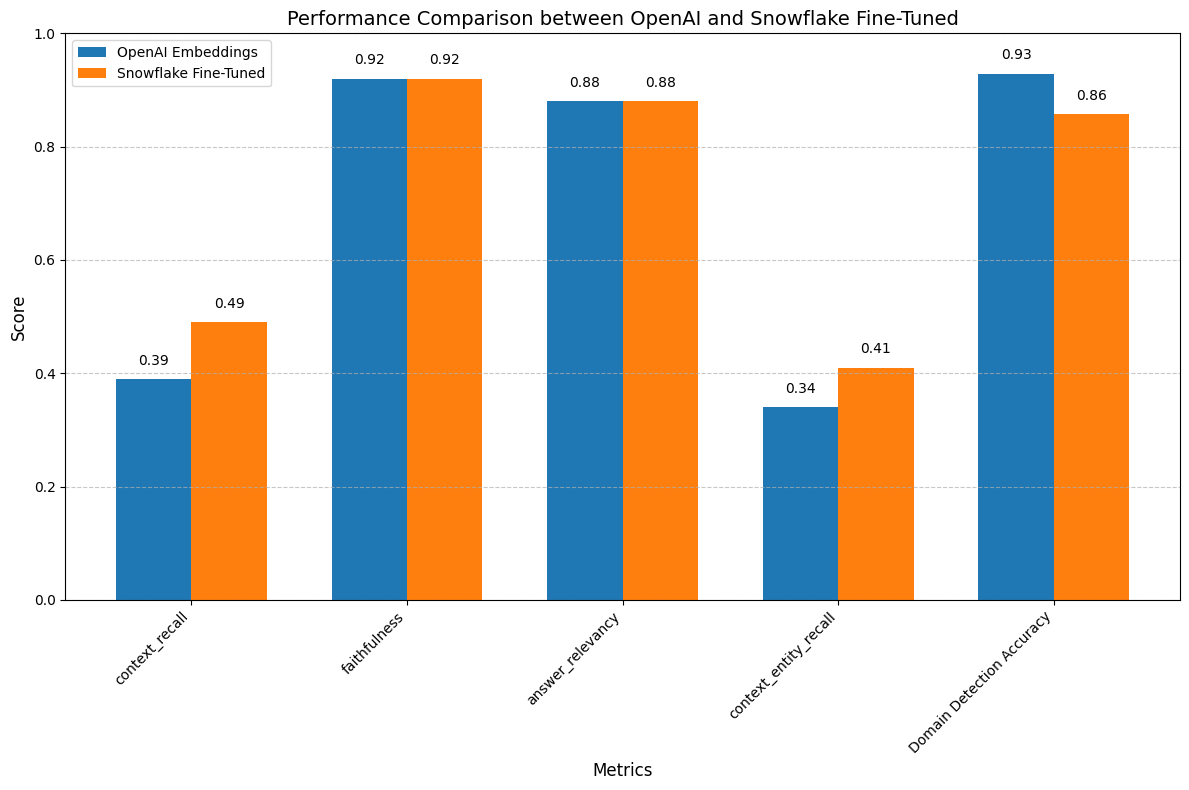

In [33]:
# Create a DataFrame to compare the results of both models
metrics = ["context_recall", "faithfulness", "answer_relevancy", "context_entity_recall", "Domain Detection Accuracy"]
openai_values = [0.39, 0.92, 0.88, 0.34, 0.9285714285714286]
finetuned_values = [0.49, 0.92, 0.88, 0.41, 0.8571428571428571]

comparison_df = pd.DataFrame({
    "Metric": metrics,
    "OpenAI Embeddings": openai_values,
    "Snowflake Fine-Tuned": finetuned_values
})

print(comparison_df)

# Create a comparative bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(metrics))

plt.bar(index - bar_width/2, openai_values, bar_width, label='OpenAI Embeddings', color='#1f77b4')
plt.bar(index + bar_width/2, finetuned_values, bar_width, label='Snowflake Fine-Tuned', color='#ff7f0e')

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Performance Comparison between OpenAI and Snowflake Fine-Tuned', fontsize=14)
plt.xticks(index, metrics, rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on the bars
for i, v in enumerate(openai_values):
    plt.text(i - bar_width/2, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

for i, v in enumerate(finetuned_values):
    plt.text(i + bar_width/2, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

plt.show()
